In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import functools
import math
import neurons


In [2]:
def calculate_euclidian_distance(vector1, vector2):
    '''
    Finds the euclidian distance between the features of a training item and the wieghts of a passed neuron.
    '''
    # find the difference squared between the vertecies of the training item and the neuron weights
    differences = [(feature - vector2[index])**2 for index, feature in enumerate(vector1)]
    
    # find the sum of the computed differences
    sum =  functools.reduce(lambda x,y : x + y, differences)
    
    square_root = math.sqrt(sum)
    return square_root
    
calculate_euclidian_distance([.1,.2,.3], neurons.StepActivationNeuron([.2, .3, .4], 1).weights )

0.17320508075688776

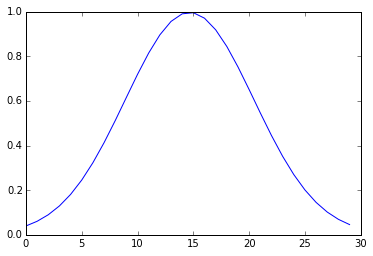

0.9851119396030626

In [28]:
def calculate_neighborhood_function(input_vector, center_vector, neighborhood_width, iteration):
    '''
    Calculates the neighborhood training coeficient with a gausian function
    '''
    euclidian_norm = calculate_euclidian_distance(input_vector, center_vector)
    return math.exp(-((euclidian_norm**2) / (2 * iteration * (neighborhood_width**2))))
    
inputs = [x for x in range(30)]
line = plt.plot(inputs, [calculate_neighborhood_function(neurons.StepActivationNeuron([-1.4 + x * .1, -1.3 + x * .1, -1.1 + x * .1], 1).weights, neurons.StepActivationNeuron([.1, .2, .3], 1).weights, 1, 1) for x in range(30)]);
plt.show();
calculate_neighborhood_function(neurons.StepActivationNeuron([.2, .3, .4], 1).weights, neurons.StepActivationNeuron([.1, .2, .3], 1).weights, 1, 1)

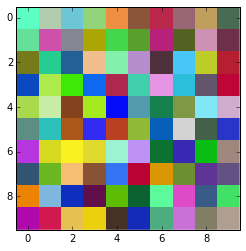

In [10]:
# number of iterations.
iterations  = 1

# create a random set of 15 training RGB values.
training_set = [ x for x in np.random.random((15,3))]

best_matching_units = []

# Create a 50x50 array of neurons with 3 random weights each.
matrix_width = 10;
output_neurons = [[neurons.StepActivationNeuron(np.random.random(3), 1) for y in range(matrix_width)] for z in range(matrix_width)]
output_weights = [[neuron.weights for neuron in row] for row in output_neurons]

#Find the best matching neuron for each training item
for training_item in training_set:
    distances = [[calculate_euclidian_distance(training_item, neuron.weights) for neuron in row] for row in output_neurons]
    # the neuron with the smalleest distance fron the training example
    best_matching_index = np.argmin(distances);
    best_matching_index_tuple = np.unravel_index(best_matching_index, (matrix_width, matrix_width));
#     print(distances)
#     print(best_matching_index)
#     print(best_matching_index_tuple)
#     print(distances[best_matching_index_tuple[0]][best_matching_index_tuple[1]])
    
    # print(training_item)
    
# plot the weights as rgb colors.
plt.imshow(output_weights, interpolation = "none")
